In [1]:
import pandas as pd #data processing and analysis
import numpy as np #linear algebra, scientific computation
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation

from sklearn import preprocessing #for standardization
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.naive_bayes import GaussianNB # To model the Gaussian Navie Bayes classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score # to split the data into train and test parts
from sklearn.metrics import accuracy_score #for accuracy classification score
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
# Load the data files (Train and Test data are provided separately)
train_data = pd.read_csv('C:/Users/ADMIN/Desktop/Analytics vidya/train_data.csv')
test_data = pd.read_csv('C:/Users/ADMIN/Desktop/Analytics vidya/test_data.csv')


# Exploratory Analysis

In [3]:
# Check few records of the data to get a hang of it
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#Checking dimension of data
train_data.shape

(245725, 11)

In [5]:
# Now lets visualize each variable separately. 
# Types of variables present here are Categorical, ordinal and numerical.
   # Categorical features: (Gender, Occupation, Channel_Code, Credit_Product, Is_Active).
   # Ordinal features: (Region_code).
   # Numerical features: (Age, Vintage, Avg_Account_Balance).

In [6]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
# To View DEtails of Categorical Columns as well WE need to Add Parameter "include="all" with Describe

train_data.describe(include="all")

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,MEWTM948,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [8]:
#Checking missing values in all the columns - how many null in each column
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
# Ordinal Features: (Region_Code).
print(f'Region_Code: {train_data.Region_Code.unique()}')


Region_Code: ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']


In [10]:
train_data.Region_Code.value_counts()


RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [11]:
train_data['Region_Code'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'



RG268    14.6%
RG283    12.0%
RG254    10.9%
RG284     7.9%
RG277     5.2%
RG280     5.2%
RG269     3.2%
RG270     3.1%
RG261     3.1%
RG257     2.5%
RG251     2.4%
RG282     2.4%
RG274     2.2%
RG272     2.1%
RG281     2.1%
RG273     1.8%
RG252     1.7%
RG279     1.6%
RG263     1.5%
RG275     1.3%
RG260     1.3%
RG256     1.2%
RG264     1.1%
RG276     1.1%
RG259     1.1%
RG250     1.0%
RG255     0.8%
RG258     0.8%
RG253     0.8%
RG278     0.7%
RG262     0.7%
RG266     0.6%
RG265     0.6%
RG271     0.6%
RG267     0.6%
Name: Region_Code, dtype: object

In [12]:
# Categorical Features: (Gender, Occupation, Channel_Code, Credit_Product, Is_Active)
print(f'Gender: {train_data.Gender.unique()}')
print(f'Occupation: {train_data.Occupation.unique()}')
print(f'Channel_Code: {train_data.Channel_Code.unique()}')
print(f'Credit_Product: {train_data.Credit_Product.unique()}')
print(f'Is_Active: {train_data.Is_Active.unique()}')

Gender: ['Female' 'Male']
Occupation: ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code: ['X3' 'X1' 'X2' 'X4']
Credit_Product: ['No' nan 'Yes']
Is_Active: ['No' 'Yes']


In [13]:
######################
# Univariate Analysis#
######################

0    187437
1     58288
Name: Is_Lead, dtype: int64


<AxesSubplot:>

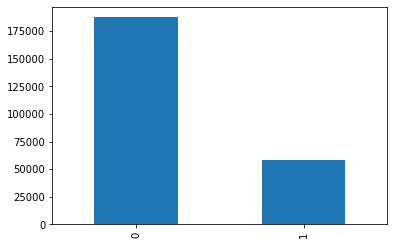

In [14]:
# Lead Status
Is_Lead_count = train_data['Is_Lead'].value_counts()
print(Is_Lead_count)
Is_Lead_count.plot.bar()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

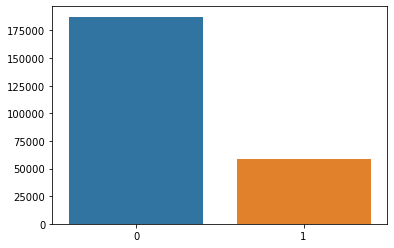

In [15]:
# Alternative way of plotting using Seaborn
sns.barplot(Is_Lead_count.index, Is_Lead_count.values)

In [16]:
# Here we see we have less than half of our customers are classified as not interested in accepting credit card, 
# we should therefore perform stratefied cv for cross validation (of course later).

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


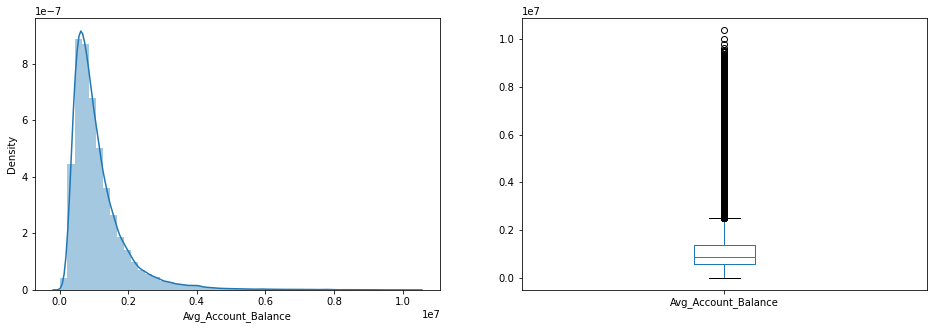

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['Avg_Account_Balance']);

plt.subplot(122)
train_data['Avg_Account_Balance'].plot.box(figsize=(16,5))

plt.show()

In [18]:
#the data is normally distributed for Avg Account Balance

Text(0.5, 0.98, '')

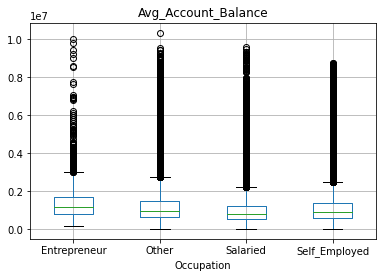

In [19]:
train_data.boxplot(column='Avg_Account_Balance', by='Occupation')
# To remove the upper title in box plot
plt.suptitle('')

In [20]:
#customers with occupation other have more account balance 

Is_Lead         0         1
Gender                     
Female   0.796419  0.203581
Male     0.734845  0.265155


<AxesSubplot:xlabel='Gender'>

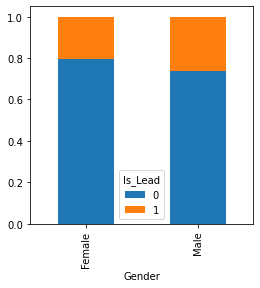

In [21]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors
Gender_Loan = pd.crosstab(train_data['Gender'],train_data['Is_Lead'])
# print(Gender)

print(Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0))
Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [22]:
### Among the females 79.6% are not interested and only 20.4% are interested in credit card
###Among the females 73.5% are not interested and only 26.5% are interested in credit card
## MAle are showing more intrest in credit card

In [23]:
cat_data_train = train_data.select_dtypes('O')
num_data_train = train_data.select_dtypes(np.number)

cat_data_test = test_data.select_dtypes('O')
num_data_test = test_data.select_dtypes(np.number)


cat_data_train.drop('ID',axis=1,inplace=True)
cat_data_test.drop('ID',axis=1,inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
#fill missing categorical values with mode

categ_cols = ['Credit_Product']
for col in categ_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [25]:
# Forward filling null values in testing data
print(test_data.isna().sum())
test_data = test_data.fillna(method='ffill')
print(test_data.isna().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64
ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


In [26]:
# checking if data is balanced or not
# Cus_0 : Customer is not interested
# Cus_1 : Customer is interested

Cus_0 = train_data[train_data['Is_Lead'] == 0]
print("Cus_0: ", len(Cus_0))
Cus_1 = train_data[train_data['Is_Lead'] == 1]
print("Cus_1: ", len(Cus_1))

Cus_0:  187437
Cus_1:  58288


In [27]:
train_data['Is_Lead'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'



0    76.3%
1    23.7%
Name: Is_Lead, dtype: object

In [31]:
#We can see that training data have 'Cus_0' is more than 'Cus_1'.

In [28]:
#create dummy variables for categorical features
dummy_cols = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
train_dummies = pd.get_dummies(train_data[dummy_cols], drop_first = True)
test_dummies = pd.get_dummies(test_data[dummy_cols], drop_first = True)


In [29]:
train_dummies.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [30]:
test_dummies.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1,1,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [31]:
# Numeric feature Extraction 
num_cols = ['Age', 'Vintage', 'Avg_Account_Balance']



df_train_num = (train_data[num_cols] - train_data[num_cols].mean()) / train_data[num_cols].std()
df_test_num = (test_data[num_cols] - train_data[num_cols].mean()) / train_data[num_cols].std()

In [32]:
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [33]:
# Recreate your final train set and test set data
df_train = pd.concat([df_train_num, train_dummies], axis =1)
df_test = pd.concat([df_test_num, test_dummies], axis =1)

In [34]:
df_train.head()


,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1.965361,-0.122373,-0.096967,0,1,0,0,0,1,0,0,0
1,-0.934427,-0.462371,-0.640628,0,0,1,0,0,0,0,0,0
2,0.818933,-0.647824,0.417278,0,0,0,1,0,1,0,0,1
3,-0.664679,-0.864186,-0.771393,1,0,1,0,0,0,0,0,0
4,-0.934427,-0.431462,-0.283276,0,0,1,0,0,0,0,0,0


In [35]:
df_test.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,-1.001864,-0.678733,-0.452598,1,1,0,0,0,0,0,1,0
1,-0.057747,0.063081,-0.237844,1,1,0,0,1,0,0,0,0
2,-0.866990,-1.018731,-1.069780,1,0,1,0,0,0,0,0,0
3,-1.001864,-0.431462,-0.305220,1,1,0,0,0,0,0,0,0
4,-1.001864,-0.864186,-0.552581,0,1,0,0,0,0,0,0,0


In [36]:
df_test.isnull().sum()

Age                         0
Vintage                     0
Avg_Account_Balance         0
Gender_Male                 0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
Credit_Product_Yes          0
Is_Active_Yes               0
dtype: int64

In [37]:
df_train["Is_Lead"]=train_data["Is_Lead"]

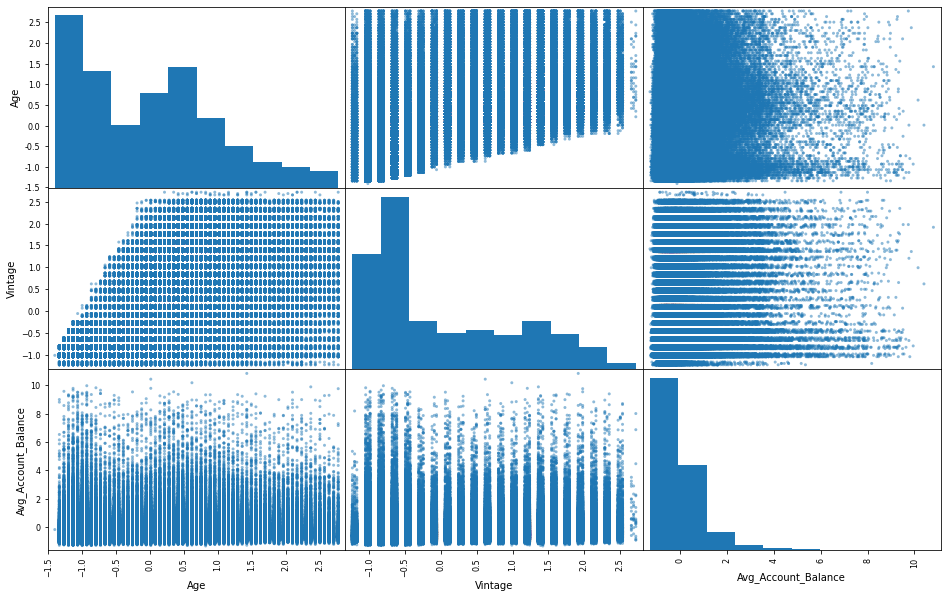

In [38]:
pd.plotting.scatter_matrix(df_train_num, figsize = (16, 10))
plt.show()

<AxesSubplot:>

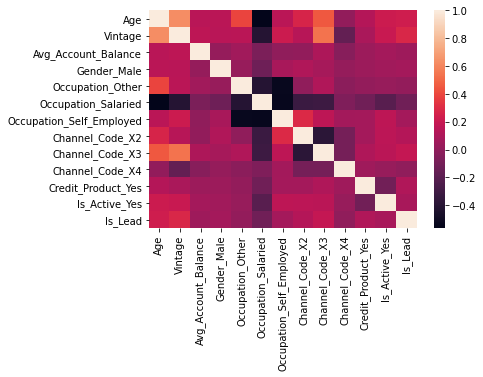

In [39]:
corr = df_train.corr()
sns.heatmap(corr)

In [40]:
# Here we see that Avg_Account_Balance and Occupation_Salaries have significant colinearity. 

# Model Parameter Tuning and Selection

In [41]:
df_train

,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Is_Lead
0,1.965361,-0.122373,-0.096967,0,1,0,0,0,1,0,0,0,0
1,-0.934427,-0.462371,-0.640628,0,0,1,0,0,0,0,0,0,0
2,0.818933,-0.647824,0.417278,0,0,0,1,0,1,0,0,1,0
3,-0.664679,-0.864186,-0.771393,1,0,1,0,0,0,0,0,0,0
4,-0.934427,-0.431462,-0.283276,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.481749,1.917615,0.934634,1,0,0,1,0,1,0,0,0,0
245721,-1.136737,-0.987822,-0.311220,1,0,1,0,0,0,0,0,1,0
245722,-1.204174,-1.049640,-0.536669,0,0,1,0,0,0,0,0,0,0
245723,-1.069301,-0.493280,-0.845197,0,0,1,0,0,0,0,0,0,0


In [42]:

columns = df_train.drop('Is_Lead',axis =1).columns
X_train, X_test, y_train, y_test = train_test_split(df_train[columns], df_train.Is_Lead, test_size = .2)

In [43]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((196580, 12), (49145, 12), (196580,), (49145,))

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
models=[]
models.append(("logreg",LogisticRegression(solver='liblinear')))
models.append(("tree",DecisionTreeClassifier()))
models.append(("forest",RandomForestClassifier(n_estimators=20)))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [46]:
models

[('logreg', LogisticRegression(solver='liblinear')),
 ('tree', DecisionTreeClassifier()),
 ('forest', RandomForestClassifier(n_estimators=20)),
 ('lda', LinearDiscriminantAnalysis()),
 ('svc', SVC()),
 ('knn', KNeighborsClassifier()),
 ('nb', GaussianNB())]

# Logistic Regression

In [47]:
final_model=LogisticRegression(solver='liblinear')
final_model.fit(X_train,y_train)
pred=final_model.predict(X_test)
print(accuracy_score(y_test,pred))


0.7770271645131753


In [48]:
seed=7
scoring='accuracy'

In [49]:

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.776529 0.001065
tree 0.711949 0.001570
forest 0.762972 0.001841
lda 0.770256 0.001308


In [ ]:
Logistic Regression

In [61]:
lr = LogisticRegression()
lrm=lr.fit(X_train, y_train)
lr_predicted_Y = lr.predict(X_test)
acc_lr = accuracy_score(y_test, lr_predicted_Y)*100
acc_lr

77.69864686132873

In [64]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [68]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

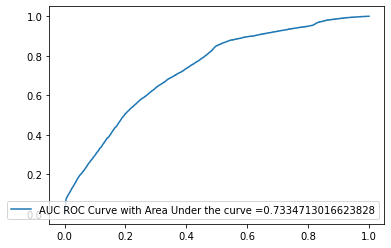

In [69]:
generate_auc_roc_curve(lrm, X_test)

#Naive Bayes

In [70]:
nb = GaussianNB()
nbm=nb.fit(X_train, y_train)
nb_predicted_Y = nb.predict(X_test)
acc_nb = accuracy_score(y_test, nb_predicted_Y)*100
acc_nb

69.45162274900804

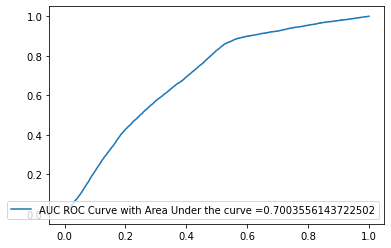

In [75]:
generate_auc_roc_curve(nbm, X_test)

Decision Tree

In [72]:
dtree = DecisionTreeClassifier()
dtm= dtree.fit(X_train, y_train)
dt_predicted_Y = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test, dt_predicted_Y)*100
acc_dtree

71.16898972428528

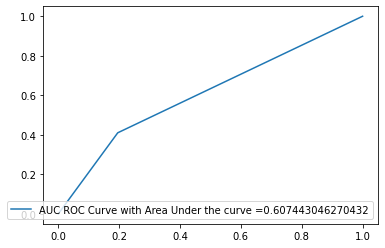

In [74]:
generate_auc_roc_curve(dtm, X_test)

In [54]:
#Random forest

In [76]:
rfm = RandomForestClassifier()
rfml=rfm.fit(X_train, y_train)
rfm_predicted_Y = rfm.predict(X_test)
acc_rfm = accuracy_score(y_test, rfm_predicted_Y)*100
acc_rfm

75.93244480618577

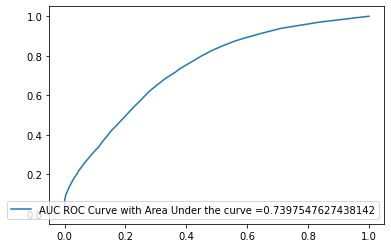

In [77]:
generate_auc_roc_curve(rfml, X_test)

In [56]:
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
xgb_predicted_Y = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, xgb_predicted_Y)*100
acc_xgb

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


79.18811679723268

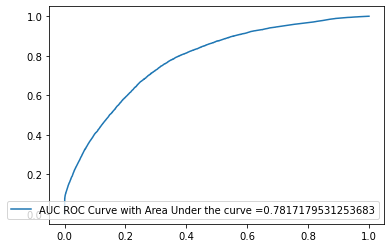

In [78]:
generate_auc_roc_curve(xgb, X_test)

Text(0, 0.5, 'Classifier Names')

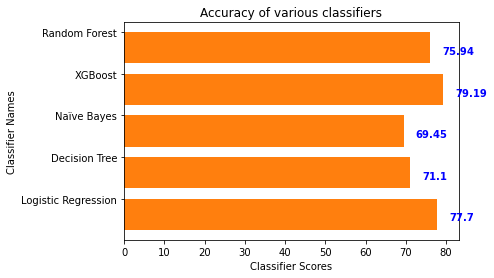

In [57]:
classifier_names = np.array(['Logistic Regression', 'Decision Tree',
                    'Naïve Bayes', 'XGBoost', 'Random Forest'])

classifier_scores = np.array([acc_lr, acc_dtree, 
                              acc_nb, acc_xgb, acc_rfm]).round(2)

# Plotting the bar graph of accuracy for every classifier

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(classifier_scores))  # the x locations for the groups
for i, v in enumerate(classifier_scores):
    ax.text(v + 3, i - .15, str(v), color='blue', fontweight='bold')
ax.barh(ind, classifier_scores, width, color="tab:orange")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(classifier_names, minor=False)
plt.title('Accuracy of various classifiers')
plt.xlabel('Classifier Scores')
plt.ylabel('Classifier Names')   

In [99]:
predictions = xgb.predict_proba(df_test)[:,1]

In [100]:
predictions

array([0.0466681 , 0.2314965 , 0.06406094, ..., 0.33414006, 0.542133  ,
       0.06849516], dtype=float32)

In [103]:
sample_submission=pd.read_csv('/Users/ADMIN/Desktop/Analytics vidya/sample_submission.csv')

In [104]:
sample_submission['Is_Lead'] = predictions
sample_submission.to_csv(f'pred_test_Xgb.csv',index=False)